In [147]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [148]:
X=wine['data']
y=wine['target']

In [149]:
X.shape, y.shape

((178, 13), (178,))

In [150]:
wine.target_names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

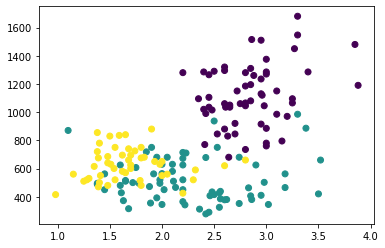

In [151]:
x=[X[:,5],X[:,12]]
plt.scatter(x[0],x[1],c=y)

### 1. K-Means
#### n 개의 등분산 그룹으로 군집화
#### 제곱합 함수를 최소화
#### 군집화 개수를 지정해야한다.
#### 각 군집 C 의 평균 을 중심점이라고함

In [152]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
data = np.transpose(x)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

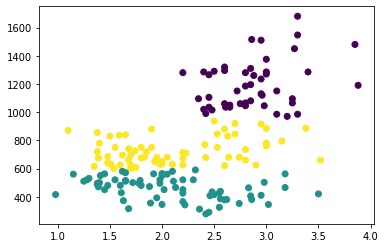

In [153]:
plt.scatter(x[0],x[1],c=kmeans.labels_)

In [154]:
kmeans.inertia_

2337902.5064238166

In [155]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

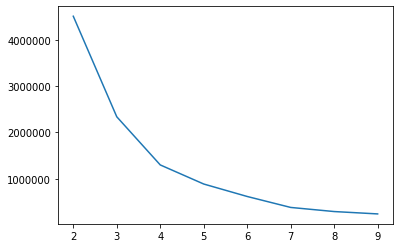

In [169]:

plt.plot(list(kiner.keys()), list(kiner.values()))

### 2. 계층 군집화(Hierarchical Clustering)
계층을 형성하는 클러스터링

In [170]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [166]:
idx = np.where(predict == 0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [167]:
idx = np.where(predict == 1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [168]:
idx = np.where(predict == 2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

  Clustering은 대표적인 비지도 학습 알고리즘으로 정답이 없으며 레이블이 없는 데이터를 그룹화 하는 알고리즘입니다. 레이블이 없는 상태의 데이터의 구조나 패턴을 찾기 위해 하는 과정입니다. 종류가 매우 다양한데 그 중 k-means를 활용한 알고리즘을 확인 할 수 있었습니다. 이외에도 Low-level parallelism, Mini Batch K-Means, Affinity Propagation, Mean Shift 등 다양한 클러스트링이 있습니다.
  데이터에 대해서 어떤식으로 클러스터링 하는지가 다른 결과를 보여주는데 데이터의 형태에 따라 잘 구분할 수 있는 클러스터링이 존재하기 때문에 잘 찾아 낼수 있느냐 없는냐가 중요한 요소 입니다.
  분석 한 wine 데이터는 비교적 간단한 분포를 띄고 있기 때문에 K-Means 분석으로 군집을 잘 구별하는 것을 확인 할 수 있습니다.
 Hierarchical Clustering로 클러스트링하여 예상된 데이터를 확인한 것을 볼 수 있습니다.